In [1]:
!pip install librosa
import librosa

  Using cached https://files.pythonhosted.org/packages/77/b5/1817862d64a7c231afd15419d8418ae1f000742cac275e85c74b219cbccb/librosa-0.7.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/2e/0b/940ea7861e0e9049f09dcfd72a90c9ae55f697c17c299a323f0148f913d2/audioread-2.1.8.tar.gz
  Using cached https://files.pythonhosted.org/packages/79/75/e22272b9c2185fc8f3af6ce37229708b45e8b855fd4bc38b4d6b040fff65/resampy-0.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/b8/de/24e4035f06540ebb4e9993238ede787063875b003e79c537511d32a74d29/SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl
  Created wheel for librosa: filename=librosa-0.7.2-cp37-none-any.whl size=1612890 sha256=a720b567e8f3b534d637e0a51a68b2befaaa7972a2595f79b12abe076ea36057
  Stored in directory: C:\Users\baps\AppData\Local\pip\Cache\wheels\4c\6e\d7\bb93911540d2d1e44d690a1561871e5b6af82b69e80938abef
  Created wheel for audioread: filename=audioread-2.1.8-cp37-non

In [3]:
import matplotlib.pyplot as plt;
%matplotlib inline
import librosa.display
plt.figure(figsize=(15, 8));

<Figure size 1080x576 with 0 Axes>

In [4]:
plt.rcParams['figure.figsize'] = 15, 8

In [5]:
audio_data = r'E:\Audio Project\laugh2.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))                    # sr - sampling rate

<class 'numpy.ndarray'> <class 'int'>


In [6]:
librosa.load(audio_data, sr=44100)

(array([-0.00608756, -0.0075118 , -0.0073375 , ...,  0.00251661,
         0.00245342,  0.00135648], dtype=float32), 44100)

In [7]:
import IPython.display as ipd
ipd.Audio(audio_data)

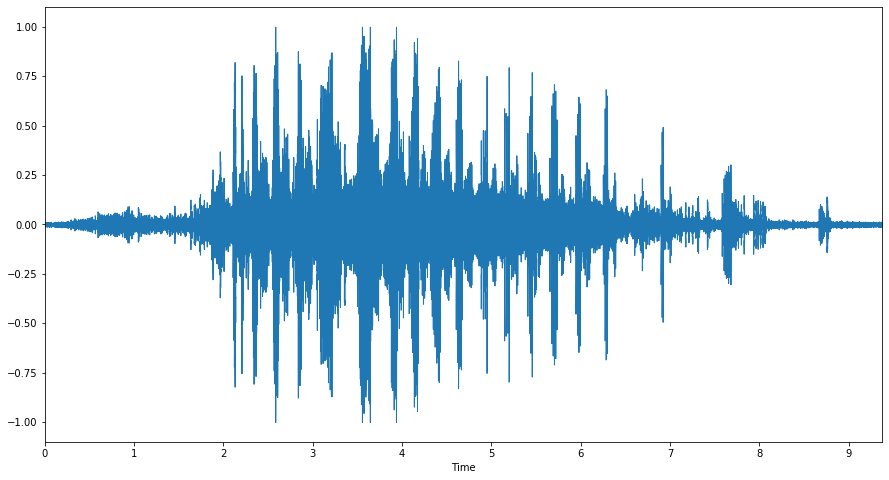

In [9]:
librosa.display.waveplot(x, sr=sr);

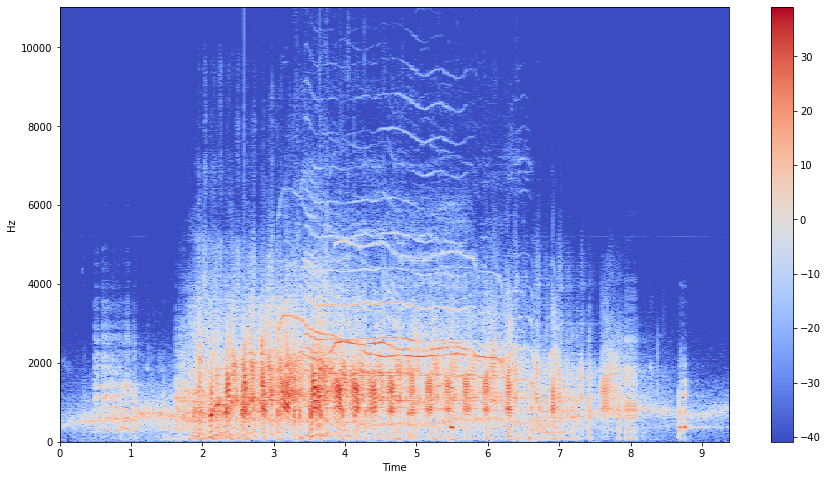

In [10]:
'''.shft - converts data into short term Fourier transform.
           converts signals such that we can know the amplitude of the given frequency at a given time
           
    .specshow is used to display a spectrogram.'''



X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

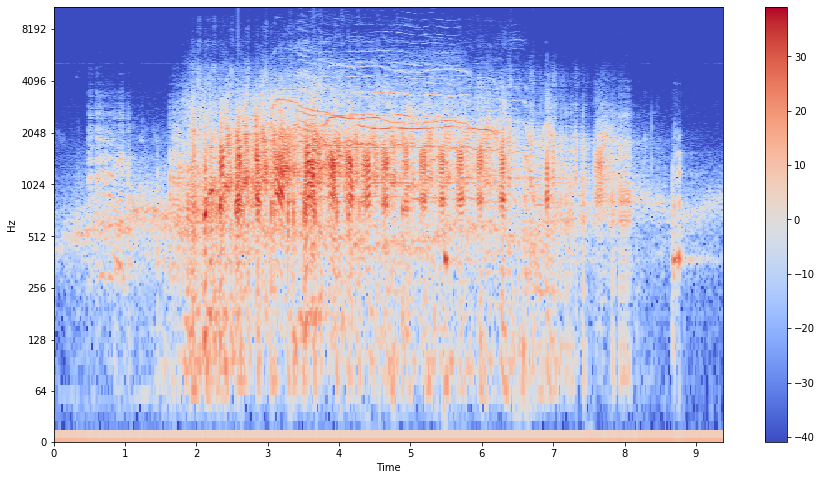

In [11]:
# all actions where at the bottom so converted frequency axis to a logarithmic one.

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [12]:
# creating audio signal

import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
# librosa.output.write_wav(r'E:\Audio Project\tone_220.wav', x, sr)

In [13]:
a = r'E:\Audio Project\tone_220.wav'
b , sr = librosa.load(a)

In [14]:
ipd.Audio(a)

In [15]:
x

array([ 0.        ,  0.03132416,  0.06252526, ..., -0.09348072,
       -0.06252526, -0.03132416])

In [17]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(216,)

In [21]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids));
print(frames)

range(0, 216)


In [22]:
t = librosa.frames_to_time(frames)

In [23]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

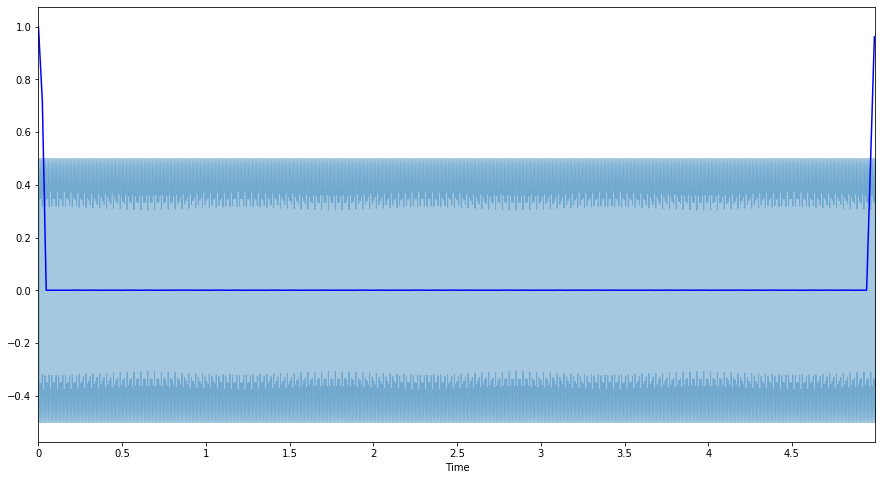

In [25]:
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b');

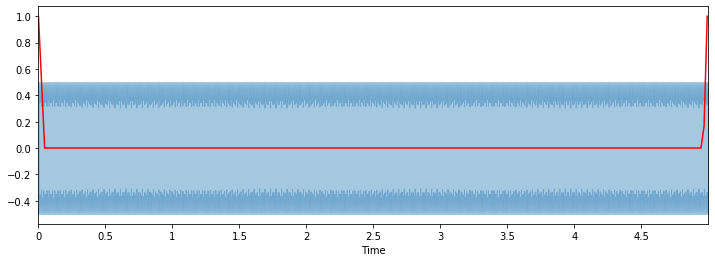

In [26]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r');

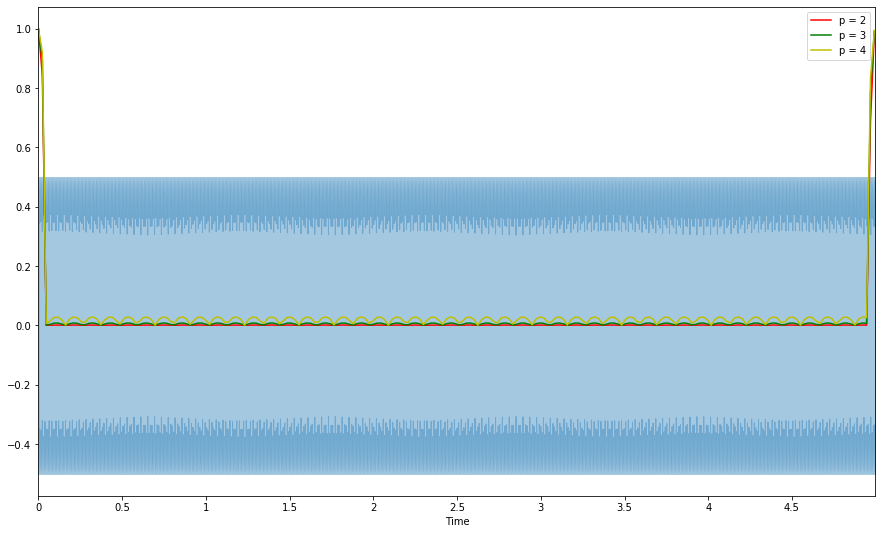

In [27]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))